In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math

from plotly.subplots import make_subplots

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from itertools import product

%matplotlib inline

c:\Users\cr-19\anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):


### <font color='157699'> **Importar Datos** </font>
---

In [3]:
# Lectura de archivo csv
df_original = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_II_Proyecto_1/main/data/ecommerce-data.csv", sep=",")

# Obtener los 10 primeros registros
df_original.head(10)

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### <font color='157699'> **Transformación de Variables** </font>
---

In [4]:
df_original[['Weekend', 'Purchase']] = df_original[['Weekend', 'Purchase']].astype(int)
df_original[['OperatingSystems','Browser',
             'Region', 'TrafficType', 'VisitorType']] = df_original[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']].astype(str)

In [5]:
# Variables numéricas

df_nums = df_original.select_dtypes(include=['int64', 'int32', 'float64'])

In [6]:
# Variables numéricas escaladas

scaler = MinMaxScaler()
df_nums_scaled = pd.DataFrame(scaler.fit_transform(df_nums), columns=df_nums.columns)

In [7]:
# Variables categóricas

df_cats = df_original.select_dtypes(include=['object'])

In [8]:
# Variables categóricas dummizadas

df_cats_dummies = pd.get_dummies(df_cats)

### <font color='157699'> **Dataframes** </font>
---

In [9]:
# df concatenado variables numéricas y dummizadas

df = pd.concat([df_nums, df_cats_dummies], axis=1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# df_1 concatenado variables escaladas y dummizadas

df_final = pd.concat([df_nums_scaled, df_cats_dummies], axis=1)

In [13]:
df_final.drop_duplicates(inplace=True)


In [14]:
df_final.duplicated().sum()

0

---

In [15]:
X1 = df.drop('Purchase', axis=1)
y1 = df['Purchase']

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', X1_train.shape)
print('Tamaño del conjunto de validación: ', X1_test.shape)

Tamaño del conjunto de entrenamiento:  (9764, 74)
Tamaño del conjunto de validación:  (2441, 74)


In [17]:
X = df_final.drop('Purchase', axis=1)
y = df_final['Purchase']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de validación: ', X_test.shape)

Tamaño del conjunto de entrenamiento:  (9764, 74)
Tamaño del conjunto de validación:  (2441, 74)


---

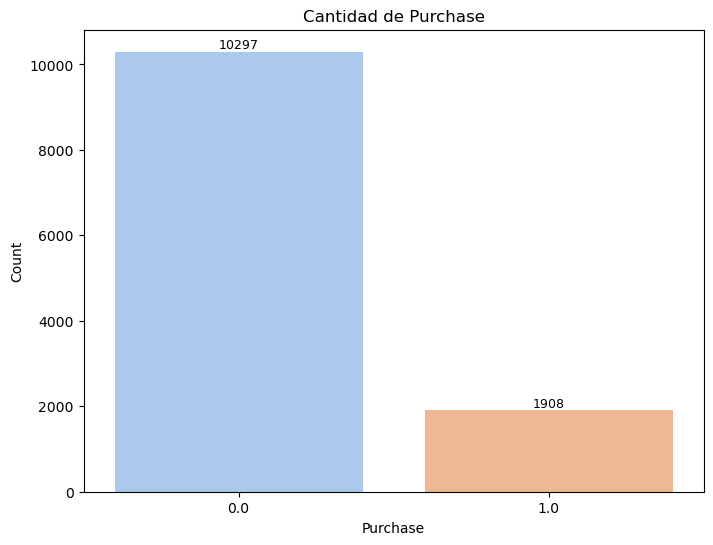

In [19]:
# Conteo de la varibale objetivo Purchase
conteo_purchase = df_final['Purchase'].value_counts()

# Colores personalizados para las barras
colores = sns.color_palette('pastel', len(conteo_purchase))

# Crear el gráfico de barras con los mismos colores
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=conteo_purchase.index, y=conteo_purchase.values, palette=colores)

# Añadir etiquetas y título
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Cantidad de Purchase')

# Añadir etiquetas a las barras
for i, v in enumerate(conteo_purchase.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

# Mostrar el gráfico
plt.show()

# <font color='157699'> **Modelo Base** </font>
---

In [20]:
modelo_base = LogisticRegression(max_iter=10000)
modelo_base.fit(X_train, y_train)
y_train_pred = modelo_base.predict(X_train)

print('Exactitud en el entrenamiento: %.4f'  %accuracy_score(y_train, y_train_pred))

Exactitud en el entrenamiento: 0.8746


In [21]:
y_pred = modelo_base.predict(X_test)

print('Exactitud en la validacion: %.4f'  %accuracy_score(y_test, y_pred))

Exactitud en la validacion: 0.8824


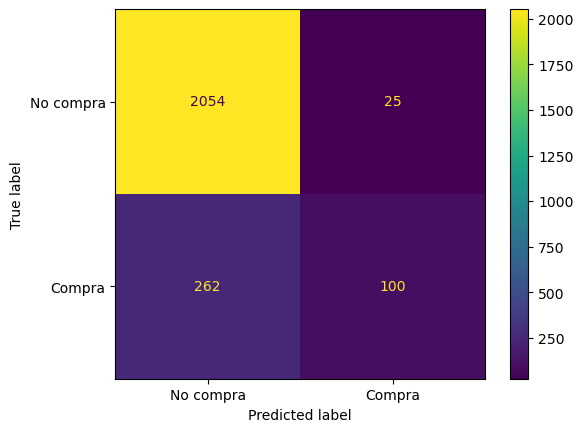

In [22]:
# Matriz de confusión del modelo base

mc_base = confusion_matrix(y_test, y_pred)
mc_base_display = ConfusionMatrixDisplay(confusion_matrix = mc_base, display_labels = ['No compra', 'Compra'])
mc_base_display.plot()
plt.show()

In [23]:
# Métricas de desempeño

print ("Train - Accuracy :", metrics.accuracy_score(y_train, modelo_base.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, modelo_base.predict(X_train), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, modelo_base.predict(X_test)))
print ("Test - classification report:\n", metrics.classification_report(y_test, modelo_base.predict(X_test), digits=4))

Train - Accuracy : 0.8746415403523147
Train - classification report:
               precision    recall  f1-score   support

         0.0     0.8804    0.9848    0.9297      8218
         1.0     0.7815    0.2891    0.4221      1546

    accuracy                         0.8746      9764
   macro avg     0.8310    0.6370    0.6759      9764
weighted avg     0.8648    0.8746    0.8493      9764

Test - Accuracy : 0.882425235559197
Test - classification report:
               precision    recall  f1-score   support

         0.0     0.8869    0.9880    0.9347      2079
         1.0     0.8000    0.2762    0.4107       362

    accuracy                         0.8824      2441
   macro avg     0.8434    0.6321    0.6727      2441
weighted avg     0.8740    0.8824    0.8570      2441



In [24]:
from sklearn.metrics import roc_auc_score

y_pred_proba_base = modelo_base.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_base)
print("AUC del modelo base:", round(auc_score, 4))

AUC del modelo base: 0.8833


### <font color='157699'> **Con Balanceo de Clases** </font>
---

In [25]:
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X, y, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', X_train_balance.shape)
print('Tamaño del conjunto de validación: ', X_test_balance.shape)

Tamaño del conjunto de entrenamiento:  (9764, 74)
Tamaño del conjunto de validación:  (2441, 74)


In [26]:
modelo_balance = LogisticRegression(class_weight = "balanced", random_state=123, max_iter=10000)
modelo_balance.fit(X_train_balance, y_train_balance)
y_train_pred_balance = modelo_balance.predict(X_train_balance)

print('Exactitud en el entrenamiento: %.4f'  %accuracy_score(y_train, y_train_pred_balance))

Exactitud en el entrenamiento: 0.8181


In [27]:
y_pred_balance = modelo_balance.predict(X_test_balance)

print('Exactitud en el validacion: %.4f'  %accuracy_score(y_test_balance, y_pred_balance))

Exactitud en el validacion: 0.8267


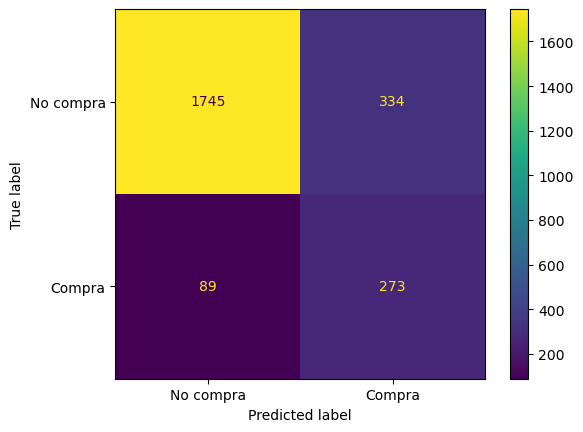

In [28]:
# Matriz de confunsión del modelo con balanceo

mc_balance = confusion_matrix(y_test_balance, y_pred_balance)
mc_display_balance = ConfusionMatrixDisplay(confusion_matrix = mc_balance, display_labels = ['No compra', 'Compra'])
mc_display_balance.plot()
plt.show()

In [29]:
# Métricas de desempeño

print ("Train - Accuracy :", metrics.accuracy_score(y_train_balance, modelo_balance.predict(X_train_balance)))
print ("Train - classification report:\n", metrics.classification_report(y_train_balance, modelo_balance.predict(X_train_balance), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test_balance, modelo_balance.predict(X_test_balance)))
print ("Test - classification report\n:", metrics.classification_report(y_test_balance, modelo_balance.predict(X_test_balance), digits=4))

Train - Accuracy : 0.8181073330602212
Train - classification report:
               precision    recall  f1-score   support

         0.0     0.9521    0.8254    0.8842      8218
         1.0     0.4564    0.7794    0.5757      1546

    accuracy                         0.8181      9764
   macro avg     0.7043    0.8024    0.7300      9764
weighted avg     0.8736    0.8181    0.8354      9764

Test - Accuracy : 0.8267103646046702
Test - classification report
:               precision    recall  f1-score   support

         0.0     0.9515    0.8393    0.8919      2079
         1.0     0.4498    0.7541    0.5635       362

    accuracy                         0.8267      2441
   macro avg     0.7006    0.7967    0.7277      2441
weighted avg     0.8771    0.8267    0.8432      2441



In [30]:
# AUC
from sklearn.metrics import roc_auc_score

y_pred_proba_balance = modelo_balance.predict_proba(X_test_balance)[:, 1]
auc_score = roc_auc_score(y_test_balance, y_pred_proba_balance)
print("AUC del modelo:", round(auc_score, 4))

AUC del modelo base: 0.8926


# <font color='056938'> **Selección de Características** </font>
---

### <font color='157699'> **Con Método Wrapper (RFE)** </font>
---

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [32]:
model = LogisticRegression(max_iter=3000) # como máximo va a correr 300 veces sobre los datos de entrenamiento para tratar de ajustarse a ellos

X_new = recursive_feature_selection(X_train, y_train, model, 30)

X_train_wrap = X_train.iloc[:,X_new]
X_test_wrap = X_test.iloc[:,X_new]
X_train_wrap.head()

Num Features: 30
Selected Features: [False  True  True  True  True  True  True  True  True  True False  True
 False  True  True False False False  True  True  True False False False
 False False  True  True False False False False  True  True False  True
 False False  True False False False False False False False False False
 False False False False False  True False  True False  True  True False
  True False False False  True False  True False False  True False False
  True False]
Feature Ranking: [13  1  1  1  1  1  1  1  1  1 25  1 12  1  1 24 14 23  1  1  1 39 16  4
 17 43  1  1  3 20 30 42  1  1 21  1 26  8  1 22 40 29 33 18 31 38 11 34
 32 36 10 28  2  1 44  1  9  1  1 45  1 19 15  7  1 35  1 27  5  1 41  6
  1 37]


,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,...,Browser_6,TrafficType_11,TrafficType_13,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_3,TrafficType_5,TrafficType_8,VisitorType_Other
5304,0.000000,0.000000,0.000000,0.008511,0.002063,0.000000,0.166667,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,0,0
9686,0.000000,0.000000,0.000000,0.123404,0.018722,0.000000,0.011765,0.105043,0.0,0,...,0,0,0,0,0,0,0,0,0,0
11085,0.057104,0.041667,0.027948,0.021277,0.006976,0.000000,0.078431,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7515,0.069555,0.000000,0.000000,0.019858,0.005341,0.298246,0.421053,0.000000,0.0,0,...,0,0,0,0,0,0,1,0,0,0
6717,0.000000,0.000000,0.000000,0.009929,0.026912,0.190476,0.192857,0.000000,0.0,0,...,0,0,0,0,0,0,1,0,0,0


### <font color='157699'> **Con Método Integrado (L1)** </font>
---

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import numpy as np

sel_ = SelectFromModel(Lasso(alpha=0.001), max_features=30)
sel_.fit(X_train, y_train)

print(sel_.estimator_.coef_)

X_new_1 = sel_.get_support()

X_train_intg = X_train.iloc[:,X_new_1]
X_test_intg = X_test.iloc[:,X_new_1]
X_train_intg.head()

[ 4.36266795e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.13381672e-01  0.00000000e+00  0.00000000e+00 -1.30340197e-01
  2.83308466e+00 -7.28715947e-03  2.12357822e-03  0.00000000e+00
 -3.15868766e-02 -0.00000000e+00  4.91616619e-05 -0.00000000e+00
 -1.71051659e-02 -2.19656931e-02  8.15003036e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.38619425e-02 -9.27899220e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.50123035e-02
  1.19855682e-03  0.00000000e+00  0.00000000e+00 -3.35619576e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

,Reviews,ProductRelated,ExitRates,PageValues,SpecialDay,Weekend,Month_Dec,Month_Jul,Month_Mar,Month_May,Month_Nov,OperatingSystems_2,OperatingSystems_3,TrafficType_1,TrafficType_10,TrafficType_13,TrafficType_2,TrafficType_3,VisitorType_New_Visitor
5304,0.000000,0.008511,0.166667,0.000000,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1
9686,0.000000,0.123404,0.011765,0.105043,0.0,0.0,0,0,0,0,1,1,0,0,0,0,1,0,1
11085,0.259259,0.021277,0.078431,0.000000,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0
7515,0.259259,0.019858,0.421053,0.000000,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0
6717,0.000000,0.009929,0.192857,0.000000,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0


---

In [34]:
# Eliminar columnas especificadas
df_final.drop(['Reviews_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates'], axis=1, inplace=True)

---

# <font color='056938'> **1. Regresión Logística** </font>
---

### <font color='157699'> **1.1. Modelo con Submuestreo** </font>
---

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [36]:
# Dividir los datos en características (X) y variable objetivo (y)
X_log_sub = df_final.drop('Purchase', axis=1)
y_log_sub = df_final['Purchase']

In [37]:
from sklearn.model_selection import train_test_split

X_train_log_sub, X_test_log_sub, y_train_log_sub, y_test_log_sub = train_test_split(X_log_sub, y_log_sub, test_size=0.2, random_state = 123)

print('Tamaño del conjunto de entrenamiento: ', X_train_log_sub.shape)
print('Tamaño del conjunto de validación: ', X_test_log_sub.shape)

Tamaño del conjunto de entrenamiento:  (9764, 70)
Tamaño del conjunto de validación:  (2441, 70)


In [38]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=123)
X_rus, y_rus = rus.fit_resample(X_train_log_sub, y_train_log_sub)

print("Original dataset shape:", Counter(y_log_sub))
# Nuevo dataset shape después del submuestreo
print("Resampled dataset shape:", Counter(y_rus))

Original dataset shape: Counter({0.0: 10297, 1.0: 1908})
Resampled dataset shape: Counter({0.0: 1496, 1.0: 1496})


In [39]:
from sklearn.metrics import f1_score, recall_score

model_log_sub = LogisticRegression(max_iter=10000, random_state=123)

model_log_sub.fit(X_rus, y_rus)

y_train_pred_log_sub = model_log_sub.predict(X_train_log_sub)

In [40]:
y_pred_log_sub = model_log_sub.predict(X_test_log_sub)

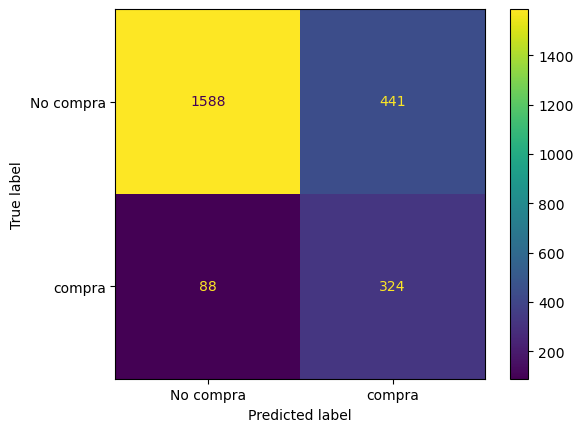

In [41]:
# Matriz de confusión para modelo con submuestreo

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc_log_sub = confusion_matrix(y_test_log_sub, y_pred_log_sub)

mc_log_sub_display = ConfusionMatrixDisplay(confusion_matrix = mc_log_sub, display_labels = ['No compra', 'compra'])
mc_log_sub_display.plot()
plt.show()

In [42]:
# Métricas de desempeño

print ("Train - Accuracy :", metrics.accuracy_score(y_train_log_sub, model_log_sub.predict(X_train_log_sub)))
print ("Train - classification report:\n", metrics.classification_report(y_train_log_sub, model_log_sub.predict(X_train_log_sub), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test_log_sub, model_log_sub.predict(X_test_log_sub)))
print ("Test - classification report\n:", metrics.classification_report(y_test_log_sub, model_log_sub.predict(X_test_log_sub), digits=4))

Train - Accuracy : 0.7801106104055715
Train - classification report:
               precision    recall  f1-score   support

         0.0     0.9529    0.7788    0.8571      8268
         1.0     0.3918    0.7874    0.5232      1496

    accuracy                         0.7801      9764
   macro avg     0.6723    0.7831    0.6902      9764
weighted avg     0.8670    0.7801    0.8059      9764

Test - Accuracy : 0.7832855387136419
Test - classification report
:               precision    recall  f1-score   support

         0.0     0.9475    0.7827    0.8572      2029
         1.0     0.4235    0.7864    0.5506       412

    accuracy                         0.7833      2441
   macro avg     0.6855    0.7845    0.7039      2441
weighted avg     0.8591    0.7833    0.8055      2441



In [43]:
# AUC
from sklearn.metrics import roc_auc_score

y_pred_proba_log_sub = model_log_sub.predict_proba(X_test_log_sub)[:, 1]
auc_score = roc_auc_score(y_test_log_sub, y_pred_proba_log_sub)
print("AUC del modelo base:", round(auc_score, 4))

AUC del modelo base: 0.8626


### <font color='157699'> **1.2. Modelo con Sobremuestreo** </font>
---

In [44]:
X_log_over = df_final.drop('Purchase', axis=1)
y_log_over = df_final['Purchase']

In [45]:
from sklearn.model_selection import train_test_split
X_train_log_over, X_test_log_over, y_train_log_over, y_test_log_over = train_test_split(X_log_over, y_log_over, test_size = 0.2, random_state = 123)

print('Tamaño del conjunto de entrenamiento: ', X_train_log_over.shape)
print('Tamaño del conjunto de validación: ', X_test_log_over.shape)

Tamaño del conjunto de entrenamiento:  (9764, 70)
Tamaño del conjunto de validación:  (2441, 70)


In [46]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=123)
X_ros, y_ros = ros.fit_resample(X_train_log_over, y_train_log_over)

print("Original dataset shape:", Counter(y_log_over))
print("Resampled dataset shape:", Counter(y_ros))

Original dataset shape: Counter({0.0: 10297, 1.0: 1908})
Resampled dataset shape: Counter({0.0: 8268, 1.0: 8268})


In [47]:
from sklearn.metrics import f1_score, recall_score

model_log_over = LogisticRegression(max_iter=10000, random_state=123)

model_log_over.fit(X_ros, y_ros)

y_train_pred_log_over = model_log_over.predict(X_train_log_over)

In [48]:
y_pred_log_over = model_log_over.predict(X_test_log_over)

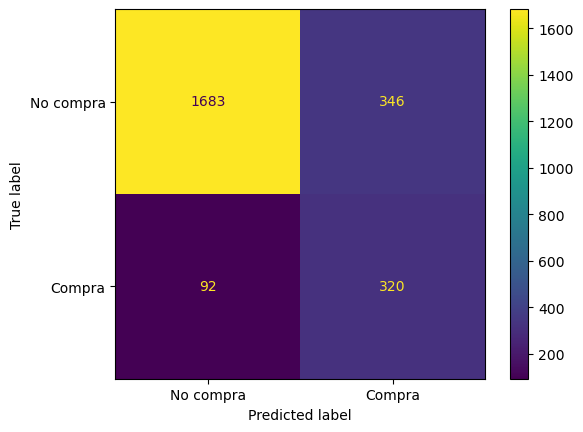

In [49]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc_log_over = confusion_matrix(y_test_log_over, y_pred_log_over)

mc_log_over_display = ConfusionMatrixDisplay(confusion_matrix = mc_log_over, display_labels=['No compra', 'Compra'])
mc_log_over_display.plot()
plt.show()

In [50]:
# Métricas de desempeño

print ("Train - Accuracy :", metrics.accuracy_score(y_train_log_over, model_log_over.predict(X_train_log_over)))
print ("Train - classification report:\n", metrics.classification_report(y_train_log_over, model_log_over.predict(X_train_log_over), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test_log_over, model_log_over.predict(X_test_log_over)))
print ("Test - classification report\n:", metrics.classification_report(y_test_log_over, model_log_over.predict(X_test_log_over), digits=4))

Train - Accuracy : 0.8208725931995084
Train - classification report:
               precision    recall  f1-score   support

         0.0     0.9535    0.8289    0.8868      8268
         1.0     0.4509    0.7767    0.5706      1496

    accuracy                         0.8209      9764
   macro avg     0.7022    0.8028    0.7287      9764
weighted avg     0.8765    0.8209    0.8384      9764

Test - Accuracy : 0.820565342072921
Test - classification report
:               precision    recall  f1-score   support

         0.0     0.9482    0.8295    0.8849      2029
         1.0     0.4805    0.7767    0.5937       412

    accuracy                         0.8206      2441
   macro avg     0.7143    0.8031    0.7393      2441
weighted avg     0.8692    0.8206    0.8357      2441



In [51]:
# AUC
from sklearn.metrics import roc_auc_score

y_pred_proba_log_over = model_log_over.predict_proba(X_test_log_over)[:, 1]
auc_score = roc_auc_score(y_test_log_over, y_pred_proba_log_over)
print("AUC del modelo:", round(auc_score, 4))

AUC del modelo base: 0.8841


### <font color='157699'> **1.3. Modelo con Wrapper** </font>
---

In [52]:
model_log_wrap = LogisticRegression(class_weight='balanced', random_state=123)

model_log_wrap.fit(X_train_wrap, y_train)

y_train_pred_log_wrap = model_log_wrap.predict(X_train_wrap)

print('Exactitud en el entrenamiento: %.4f'  %accuracy_score(y_train, y_train_pred_log_wrap))

Exactitud en el entrenamiento: 0.8176


In [53]:
y_pred_log_wrap = model_log_wrap.predict(X_test_wrap)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.4f'  %accuracy_score(y_test, y_pred_log_wrap))

Exactitud en la validacion: 0.8230


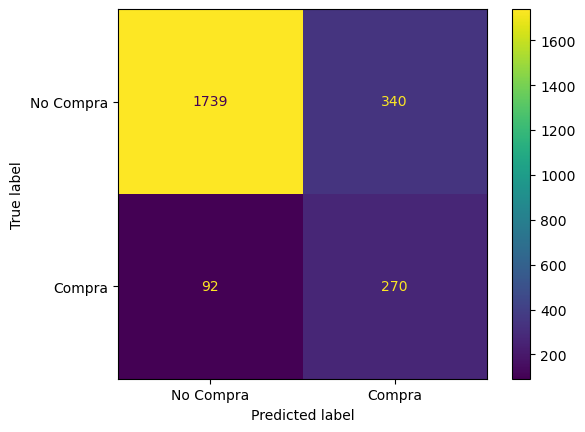

In [54]:
mc_log_wrap = confusion_matrix(y_test, y_pred_log_wrap)
mc_log_wrap_display = ConfusionMatrixDisplay(confusion_matrix = mc_log_wrap, display_labels=['No Compra', 'Compra'])
mc_log_wrap_display.plot()
plt.show()

In [55]:
# Métricas de desempeño

print ("Train - Accuracy :", metrics.accuracy_score(y_train, model_log_wrap.predict(X_train_wrap)))
print ("Train - classification report:\n", metrics.classification_report(y_train, model_log_wrap.predict(X_train_wrap), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, model_log_wrap.predict(X_test_wrap)))
print ("Test - classification report\n:", metrics.classification_report(y_test, model_log_wrap.predict(X_test_wrap), digits=4))

Train - Accuracy : 0.8175952478492421
Train - classification report:
               precision    recall  f1-score   support

         0.0     0.9511    0.8257    0.8840      8218
         1.0     0.4553    0.7743    0.5734      1546

    accuracy                         0.8176      9764
   macro avg     0.7032    0.8000    0.7287      9764
weighted avg     0.8726    0.8176    0.8348      9764

Test - Accuracy : 0.8230233510856206
Test - classification report
:               precision    recall  f1-score   support

         0.0     0.9498    0.8365    0.8895      2079
         1.0     0.4426    0.7459    0.5556       362

    accuracy                         0.8230      2441
   macro avg     0.6962    0.7912    0.7225      2441
weighted avg     0.8745    0.8230    0.8400      2441



In [56]:
# AUC
from sklearn.metrics import roc_auc_score

y_pred_proba_log_wrap = model_log_wrap.predict_proba(X_test_wrap)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_log_wrap)
print("AUC del modelo:", round(auc_score, 4))


AUC del modelo base: 0.8901


### <font color='157699'> **1.4. Modelo con Integrado** </font>
---

In [57]:
from sklearn.metrics import accuracy_score

model_log_intg = LogisticRegression(random_state=123, class_weight='balanced')

model_log_intg.fit(X_train_intg, y_train)

y_train_log_intg = model_log_intg.predict(X_train_intg)

print('Exactitud en el entrenamiento: %.4f'  %accuracy_score(y_train, y_train_log_intg))

Exactitud en el entrenamiento: 0.8154


In [58]:
y_pred_log_intg = model_log_intg.predict(X_test_intg)

# Exactitud en el conjunto de validación
print('Exactitud en la validacion: %.3f'  %accuracy_score(y_test, y_pred_log_intg))

Exactitud en la validacion: 0.828


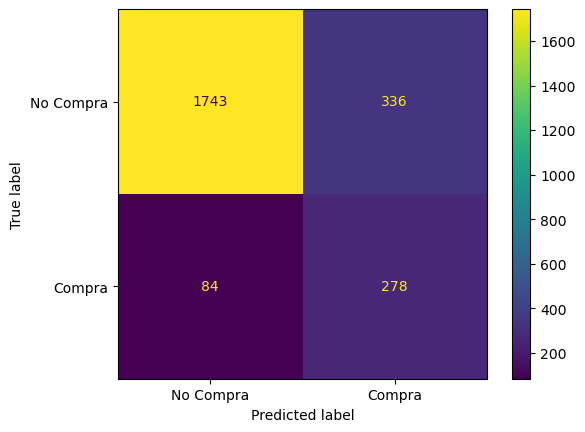

In [59]:
mc_log_intg = confusion_matrix(y_test, y_pred_log_intg)
mc_log_intg_display = ConfusionMatrixDisplay(confusion_matrix = mc_log_intg, display_labels=['No Compra', 'Compra'])
mc_log_intg_display.plot()
plt.show()

In [60]:
# Métricas de desempeño

print ("Train - Accuracy :", metrics.accuracy_score(y_train, model_log_intg.predict(X_train_intg)))
print ("Train - classification report:\n", metrics.classification_report(y_train, model_log_intg.predict(X_train_intg), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, model_log_intg.predict(X_test_intg)))
print ("Test - classification report\n:", metrics.classification_report(y_test, model_log_intg.predict(X_test_intg), digits=4))

Train - Accuracy : 0.8154444899631299
Train - classification report:
               precision    recall  f1-score   support

         0.0     0.9494    0.8247    0.8827      8218
         1.0     0.4513    0.7665    0.5681      1546

    accuracy                         0.8154      9764
   macro avg     0.7003    0.7956    0.7254      9764
weighted avg     0.8705    0.8154    0.8328      9764

Test - Accuracy : 0.8279393691110201
Test - classification report
:               precision    recall  f1-score   support

         0.0     0.9540    0.8384    0.8925      2079
         1.0     0.4528    0.7680    0.5697       362

    accuracy                         0.8279      2441
   macro avg     0.7034    0.8032    0.7311      2441
weighted avg     0.8797    0.8279    0.8446      2441



In [61]:
# AUC
from sklearn.metrics import roc_auc_score

y_pred_proba_log_intg = model_log_intg.predict_proba(X_test_intg)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_log_intg)
print("AUC del modelo:", round(auc_score, 4))


AUC del modelo base: 0.8914


### <font color='157699'> **1.5. Modelo con Cross Validation** </font>
---

In [62]:
from sklearn.model_selection import  cross_validate
from sklearn.linear_model import LogisticRegression

def cross_validation(model, _X, _y, _cv=5, scoring='f1'): # 5 es el número de paqueticos
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True) # importante

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [63]:
model_log_CV = LogisticRegression(class_weight="balanced", random_state=123, max_iter=300)
model_log_CV_2_result = cross_validation(model_log_CV, X, y, 5)

In [64]:
model_log_CV_2_result

{'Training Accuracy scores': array([0.78973781, 0.81841458, 0.82302335, 0.82015567, 0.82968046]),
 'Mean Training Accuracy': 81.6202376075379,
 'Training Precision scores': array([0.4101162 , 0.45290965, 0.46156773, 0.45637329, 0.47302087]),
 'Mean Training Precision': 0.4507975493426013,
 'Training Recall scores': array([0.78585462, 0.77472168, 0.7948886 , 0.78833552, 0.7870249 ]),
 'Mean Training Recall': 0.7861650620847462,
 'Training F1 scores': array([0.5389625 , 0.57163566, 0.58401541, 0.57808746, 0.59089791]),
 'Mean Training F1 Score': 0.5727197863498629,
 'Validation Accuracy scores': array([0.87668988, 0.84801311, 0.70176157, 0.68578451, 0.65137239]),
 'Mean Validation Accuracy': 75.27242933224089,
 'Validation Precision scores': array([0.59389671, 0.50976562, 0.32164948, 0.31219512, 0.29447853]),
 'Mean Validation Precision': 0.4063970945419375,
 'Validation Recall scores': array([0.66404199, 0.68503937, 0.81675393, 0.83769634, 0.87958115]),
 'Mean Validation Recall': 0.7766

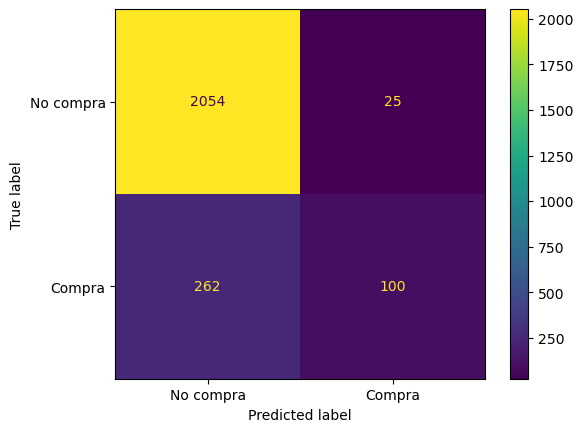

In [65]:
mc_log_CV = confusion_matrix(y_test, y_pred)

mc_cv_display = ConfusionMatrixDisplay(confusion_matrix = mc_log_CV, display_labels=['No compra', 'Compra'])
mc_cv_display.plot()
plt.show()

In [66]:
print("Mean Training F1 Score: ", model_log_CV_2_result['Mean Training F1 Score'],
      "\nMean Validation F1 Score: ", model_log_CV_2_result['Mean Validation F1 Score'])

Mean Training F1 Score:  0.5727197863498629 
Mean Validation F1 Score:  0.5138402970364061


# <font color='056938'> **2. Métodos de Ensamble** </font>
---

## <font color='157699'> **2.1. Random Forest** </font>
---

### <font color='157699'> **2.1.1. Random Forest con Wrapper** </font>

In [67]:
X_train_ranfor_wrap = X_train_wrap
X_test_ranfor_wrap = X_test_wrap

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Entrenamiento del modelo
# ==============================================================================
ranfor_wrap = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            n_jobs       = -1,
            random_state = 123
         )
ranfor_wrap.fit(X_train_ranfor_wrap, y1_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

In [69]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, ranfor_wrap.predict(X_train_ranfor_wrap)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, ranfor_wrap.predict(X_train_ranfor_wrap), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, ranfor_wrap.predict(X_test_ranfor_wrap)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, ranfor_wrap.predict(X_test_ranfor_wrap), digits=4))

Train - Accuracy : 0.9998975829578042
Train - classification report:
               precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999      8218
           1     1.0000    0.9994    0.9997      1546

    accuracy                         0.9999      9764
   macro avg     0.9999    0.9997    0.9998      9764
weighted avg     0.9999    0.9999    0.9999      9764

Test - Accuracy : 0.9061859893486276
Test - classification report
:               precision    recall  f1-score   support

           0     0.9267    0.9663    0.9461      2079
           1     0.7436    0.5608    0.6394       362

    accuracy                         0.9062      2441
   macro avg     0.8351    0.7636    0.7927      2441
weighted avg     0.8995    0.9062    0.9006      2441



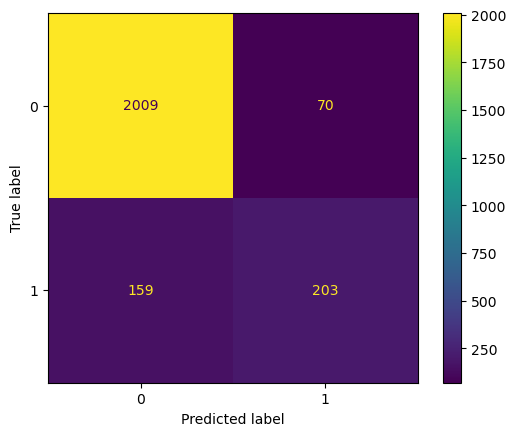

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_ranfor_wrap = confusion_matrix(y1_test, ranfor_wrap.predict(X_test_ranfor_wrap))
cm_ranfor_wrap_display = ConfusionMatrixDisplay(confusion_matrix = cm_ranfor_wrap)
cm_ranfor_wrap_display.plot()
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

y_pred_proba_ranfor_wrap = ranfor_wrap.predict_proba(X_test_ranfor_wrap)[:, 1]
auc_score = roc_auc_score(y1_test, y_pred_proba_ranfor_wrap)
print("AUC del modelo:", round(auc_score, 4))

AUC del modelo base: 0.9111


### <font color='157699'> **2.1.2. Random Forest con Integrado** </font>

In [72]:
X_train_ranfor_intg = X_train_intg
X_test_ranfor_intg = X_test_intg

In [73]:
from sklearn.ensemble import RandomForestClassifier

ranfor_intg = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            #max_depth    = 5,
            #max_leaf_nodes = 10,
            n_jobs       = -1,
            random_state = 123
         )
ranfor_intg.fit(X_train_ranfor_intg, y1_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

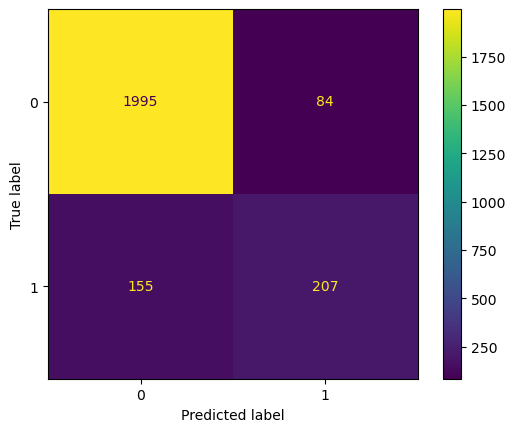

In [74]:
cm_ranfor_intg = confusion_matrix(y1_test, ranfor_intg.predict(X_test_ranfor_intg))
cm_ranfor_intg_display = ConfusionMatrixDisplay(confusion_matrix = cm_ranfor_intg)
cm_ranfor_intg_display.plot()
plt.show()

In [75]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, ranfor_intg.predict(X_train_ranfor_intg)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, ranfor_intg.predict(X_train_ranfor_intg), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, ranfor_intg.predict(X_test_ranfor_intg)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, ranfor_intg.predict(X_test_ranfor_intg), digits=4))

Train - Accuracy : 0.9995903318312167
Train - classification report:
               precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998      8218
           1     0.9987    0.9987    0.9987      1546

    accuracy                         0.9996      9764
   macro avg     0.9992    0.9992    0.9992      9764
weighted avg     0.9996    0.9996    0.9996      9764

Test - Accuracy : 0.9020893076607948
Test - classification report
:               precision    recall  f1-score   support

           0     0.9279    0.9596    0.9435      2079
           1     0.7113    0.5718    0.6340       362

    accuracy                         0.9021      2441
   macro avg     0.8196    0.7657    0.7887      2441
weighted avg     0.8958    0.9021    0.8976      2441



In [76]:
from sklearn.metrics import roc_auc_score

y_pred_proba_ranfor_intg = ranfor_intg.predict_proba(X_test_ranfor_intg)[:, 1]
auc_score = roc_auc_score(y1_test, y_pred_proba_ranfor_intg)
print("AUC del modelo:", round(auc_score, 4))

AUC del modelo base: 0.9196


### <font color='157699'> **2.1.3. Random Forest con Tunning de Hiperparámetros** </font>

#### Integrado

In [77]:
# Importar librerias adicionales
# ==============================================================================
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pprint

In [78]:
## Definir cuadricula de búsqueda
# =================================================
parameters = {
    'max_depth': [2, 5, 10, 15],
    'max_features': [0.4, 0.6, 0.8],
    'max_leaf_nodes': [14, 16, 18, 20],
    'min_samples_leaf': [8 ,10, 15, 20],
    'n_estimators': [50, 100, 150, 200]
}

In [79]:
# Búsqueda en Cuadricula
# ==============================================================================

# Modelo para tunning
ranfor_tnn_intg = RandomForestClassifier(
    criterion = 'gini',
    n_jobs = -1,
    class_weight='balanced',
    random_state= 123
)

grid_search_intg = GridSearchCV(ranfor_tnn_intg, parameters, scoring = 'roc_auc', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result_intg = grid_search_intg.fit(X_train_ranfor_intg, y1_train)

In [81]:
print('Best Params: ', grid_result_intg.best_params_)
print('Best Score: ', grid_result_intg.best_score_)

Best Params:  {'max_depth': 10, 'max_features': 0.6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'n_estimators': 100}
Best Score:  0.9321638951725639


In [82]:
print('Características usadas en el entrenamiento: ', grid_result_intg.best_estimator_.feature_names_in_)
print('Importancia de las carcaterísticas: ', grid_result_intg.best_estimator_.feature_importances_)

Características usadas en el entrenamiento:  ['Reviews' 'ProductRelated' 'ExitRates' 'PageValues' 'SpecialDay'
 'Weekend' 'Month_Dec' 'Month_Jul' 'Month_Mar' 'Month_May' 'Month_Nov'
 'OperatingSystems_2' 'OperatingSystems_3' 'TrafficType_1'
 'TrafficType_10' 'TrafficType_13' 'TrafficType_2' 'TrafficType_3'
 'VisitorType_New_Visitor']
Importancia de las carcaterísticas:  [2.02482741e-02 4.95828174e-02 5.58239148e-02 7.70714696e-01
 7.54234525e-04 3.20861824e-04 8.56191315e-04 3.22111964e-03
 9.82161799e-03 1.82987117e-02 6.15559764e-02 5.59339573e-04
 5.43232657e-04 4.11975904e-04 3.20040445e-04 6.58146450e-04
 1.77846013e-03 1.56170422e-03 2.96868495e-03]


In [83]:
# Métricas de desempeño modelo óptimo
# ==============================================================================
ranfor_optimo_tnn_intg = grid_result_intg.best_estimator_
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, ranfor_optimo_tnn_intg.predict(X_train_ranfor_intg)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, ranfor_optimo_tnn_intg.predict(X_train_ranfor_intg), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, ranfor_optimo_tnn_intg.predict(X_test_ranfor_intg)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, ranfor_optimo_tnn_intg.predict(X_test_ranfor_intg), digits=4))

Train - Accuracy : 0.8667554281032364
Train - classification report:
               precision    recall  f1-score   support

           0     0.9695    0.8691    0.9165      8218
           1     0.5511    0.8545    0.6700      1546

    accuracy                         0.8668      9764
   macro avg     0.7603    0.8618    0.7933      9764
weighted avg     0.9032    0.8668    0.8775      9764

Test - Accuracy : 0.8607128226136829
Test - classification report
:               precision    recall  f1-score   support

           0     0.9652    0.8677    0.9139      2079
           1     0.5192    0.8204    0.6360       362

    accuracy                         0.8607      2441
   macro avg     0.7422    0.8441    0.7749      2441
weighted avg     0.8991    0.8607    0.8727      2441



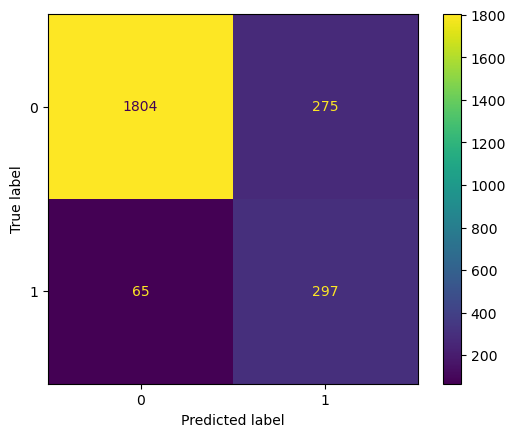

In [84]:
# Matriz de confusion
cm_ranfor_optimo_tnn_intg = confusion_matrix(y1_test, ranfor_optimo_tnn_intg.predict(X_test_ranfor_intg))
# Visualización de la matriz de confusion
cm_ranfor_optimo_tnn_intg_display = ConfusionMatrixDisplay(confusion_matrix = cm_ranfor_optimo_tnn_intg)
cm_ranfor_optimo_tnn_intg_display.plot()
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score

y_pred_proba_ranfor_optimo_tnn_intg = ranfor_optimo_tnn_intg.predict_proba(X_test_ranfor_intg)[:, 1]
auc_score = roc_auc_score(y1_test, y_pred_proba_ranfor_optimo_tnn_intg)
print("AUC del modelo:", round(auc_score, 5))


AUC del modelo óptimo: 0.92904


#### Wrapper

In [89]:
# Búsqueda en Cuadricula
# ==============================================================================

# Modelo para tunning
ranfor_tnn_wrap = RandomForestClassifier(
    criterion = 'gini',
    n_jobs = -1,
    class_weight='balanced',
    random_state= 123
)

grid_search_wrap = GridSearchCV(ranfor_tnn_wrap, parameters, scoring = 'roc_auc', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result_wrap = grid_search_wrap.fit(X_train_ranfor_wrap, y1_train)

In [90]:
print('Best Params: ', grid_result_wrap.best_params_)
print('Best Score: ', grid_result_wrap.best_score_)

Best Params:  {'max_depth': 15, 'max_features': 0.4, 'max_leaf_nodes': 20, 'min_samples_leaf': 8, 'n_estimators': 100}
Best Score:  0.9296311714663368


In [91]:
print('Características usadas en el entrenamiento: ', grid_result_wrap.best_estimator_.feature_names_in_)
print('Importancia de las carcaterísticas: ', grid_result_wrap.best_estimator_.feature_importances_)

Características usadas en el entrenamiento:  ['Reviews_Duration' 'Informational' 'Informational_Duration'
 'ProductRelated' 'ProductRelated_Duration' 'BounceRates' 'ExitRates'
 'PageValues' 'SpecialDay' 'Month_Aug' 'Month_Feb' 'Month_Jul' 'Month_Nov'
 'Month_Oct' 'Month_Sep' 'OperatingSystems_6' 'OperatingSystems_7'
 'Browser_12' 'Browser_13' 'Browser_3' 'Browser_6' 'TrafficType_11'
 'TrafficType_13' 'TrafficType_15' 'TrafficType_16' 'TrafficType_18'
 'TrafficType_3' 'TrafficType_5' 'TrafficType_8' 'VisitorType_Other']
Importancia de las carcaterísticas:  [1.69144854e-02 2.09693269e-03 2.58940684e-03 3.51057109e-02
 5.06727093e-02 2.66589908e-02 6.96114730e-02 7.18887011e-01
 2.21094894e-03 5.77622296e-04 0.00000000e+00 3.27371563e-03
 6.08528051e-02 8.43432597e-04 3.49167847e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.99361757e-05 4.16851691e-05
 0.00000000e+00 1.62641042e-04 6.13341072e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.72452223e-03 2.66233194e-03
 9.37497269

In [93]:
# Métricas de desempeño
# ==============================================================================
ranfor_optimo_tnn_wrap = grid_result_wrap.best_estimator_
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, ranfor_optimo_tnn_wrap.predict(X_train_ranfor_wrap)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, ranfor_optimo_tnn_wrap.predict(X_train_ranfor_wrap), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, ranfor_optimo_tnn_wrap.predict(X_test_ranfor_wrap)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, ranfor_optimo_tnn_wrap.predict(X_test_ranfor_wrap), digits=4))

Train - Accuracy : 0.86470708725932
Train - classification report:
               precision    recall  f1-score   support

           0     0.9710    0.8651    0.9150      8218
           1     0.5460    0.8629    0.6688      1546

    accuracy                         0.8647      9764
   macro avg     0.7585    0.8640    0.7919      9764
weighted avg     0.9038    0.8647    0.8760      9764

Test - Accuracy : 0.8603031544448996
Test - classification report
:               precision    recall  f1-score   support

           0     0.9662    0.8663    0.9135      2079
           1     0.5182    0.8260    0.6368       362

    accuracy                         0.8603      2441
   macro avg     0.7422    0.8461    0.7752      2441
weighted avg     0.8998    0.8603    0.8725      2441



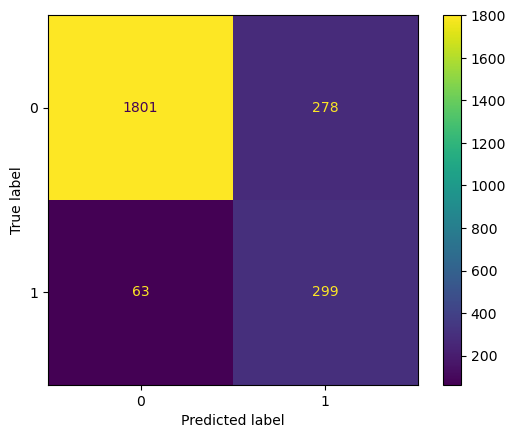

In [94]:
# Matriz de confusion
cm_ranfor_optimo_tnn_wrap = confusion_matrix(y1_test, ranfor_optimo_tnn_wrap.predict(X_test_ranfor_wrap))
# Visualización de la matriz de confusion
cm_ranfor_optimo_tnn_wrap_display = ConfusionMatrixDisplay(confusion_matrix = cm_ranfor_optimo_tnn_wrap)
cm_ranfor_optimo_tnn_wrap_display.plot()
plt.show()

In [95]:
from sklearn.metrics import roc_auc_score

y_pred_proba_ranfor_optimo_tnn_wrap = ranfor_optimo_tnn_wrap.predict_proba(X_test_ranfor_wrap)[:, 1]
auc_score = roc_auc_score(y1_test, y_pred_proba_ranfor_optimo_tnn_wrap)
print("AUC del modelo:", round(auc_score, 4))


AUC del modelo óptimo: 0.9218


## <font color='157699'> **2.2. XGB Classifier** </font>
---

### <font color='157699'> **2.2.1. XGB con Wrapper** </font>

In [109]:
X_train_XGB_wrap = X_train_wrap
X_test_XGB_wrap = X_test_wrap

In [113]:
from xgboost import XGBClassifier

XGB_wrap = XGBClassifier(
    n_estimators = 100,
    learning_rate= 0.1,
    max_depth = 4,
    random_state = 123
)

XGB_wrap.fit(X_train_XGB_wrap, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [115]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, XGB_wrap.predict(X_train_XGB_wrap)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, XGB_wrap.predict(X_train_XGB_wrap), digits = 4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, XGB_wrap.predict(X_test_XGB_wrap)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, XGB_wrap.predict(X_test_XGB_wrap), digits = 4))

Train - Accuracy : 0.9224702990577632
Train - classification report:
               precision    recall  f1-score   support

           0     0.9423    0.9671    0.9545      8218
           1     0.7968    0.6850    0.7367      1546

    accuracy                         0.9225      9764
   macro avg     0.8696    0.8261    0.8456      9764
weighted avg     0.9192    0.9225    0.9200      9764

Test - Accuracy : 0.9070053256861942
Test - classification report
:               precision    recall  f1-score   support

           0     0.9331    0.9596    0.9462      2079
           1     0.7228    0.6050    0.6586       362

    accuracy                         0.9070      2441
   macro avg     0.8279    0.7823    0.8024      2441
weighted avg     0.9019    0.9070    0.9035      2441



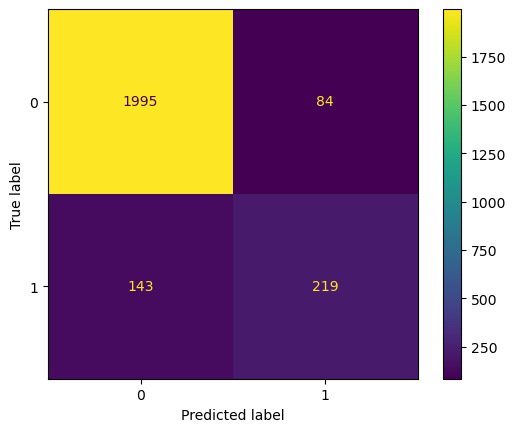

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_XGB_wrap = confusion_matrix(y1_test, XGB_wrap.predict(X_test_XGB_wrap))

cm_XGB_wrap_display = ConfusionMatrixDisplay(confusion_matrix = cm_XGB_wrap)
cm_XGB_wrap_display.plot()
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score

y_pred_proba_XGB_wrap = XGB_wrap.predict_proba(X_test_XGB_wrap)[:, 1]
auc_score = roc_auc_score(y1_test, y_pred_proba_XGB_wrap)
print("AUC del modelo:", round(auc_score, 4))

AUC del modelo: 0.9239


### <font color='157699'> **2.2.2. XGB con Integrado** </font>

In [123]:
X_train_XGB_intg = X_train_intg
X_test_XGB_intg = X_test_intg

In [124]:
# Entrenamiento del modelo: N_ESTIMATORS = 100, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================
XGB_intg = XGBClassifier(
    n_estimators = 100,
    learning_rate= 0.1,
    max_depth = 4,
    random_state = 123
)

XGB_intg.fit(X_train_XGB_intg, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

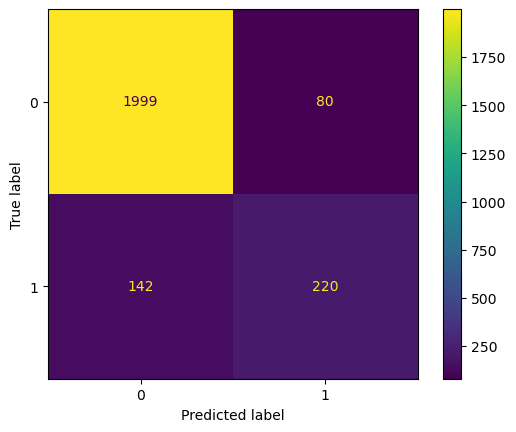

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_XGB_intg = confusion_matrix(y1_test, XGB_intg.predict(X_test_XGB_intg))
cm_XGB_intg_display = ConfusionMatrixDisplay(confusion_matrix = cm_XGB_intg)
cm_XGB_intg_display.plot()
plt.show()

In [126]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, XGB_intg.predict(X_train_XGB_intg)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, XGB_intg.predict(X_train_XGB_intg), digits = 4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, XGB_intg.predict(X_test_XGB_intg)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, XGB_intg.predict(X_test_XGB_intg), digits = 4))

Train - Accuracy : 0.9177591151167555
Train - classification report:
               precision    recall  f1-score   support

           0     0.9402    0.9636    0.9517      8218
           1     0.7770    0.6740    0.7219      1546

    accuracy                         0.9178      9764
   macro avg     0.8586    0.8188    0.8368      9764
weighted avg     0.9143    0.9178    0.9153      9764

Test - Accuracy : 0.9090536665301107
Test - classification report
:               precision    recall  f1-score   support

           0     0.9337    0.9615    0.9474      2079
           1     0.7333    0.6077    0.6647       362

    accuracy                         0.9091      2441
   macro avg     0.8335    0.7846    0.8060      2441
weighted avg     0.9040    0.9091    0.9055      2441



In [128]:
from sklearn.metrics import roc_auc_score

y_pred_proba_XGB_intg = XGB_intg.predict_proba(X_test_XGB_intg)[:, 1]
auc_score = roc_auc_score(y1_test, y_pred_proba_XGB_intg)
print("AUC del modelo:", round(auc_score, 4))

AUC del modelo: 0.9322


### <font color='157699'> **2.1.3. XGB con Tunning de Hiperparámetros** </font>

#### Integrado

In [129]:
parameters = {
    'n_estimators': [50, 100, 300],
    'max_features': [5, 6, 7],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.7, 0.8, 0.9,]}

In [130]:
# Modelo para tunning
XGB_intg_hpp = GradientBoostingClassifier(
    random_state= 123
)

grid_search_XGB_intg_hpp = GridSearchCV(XGB_intg_hpp, parameters, scoring = 'roc_auc', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result_XGB_intg_hpp = grid_search_XGB_intg_hpp.fit(X_train_XGB_intg, y1_train)

print('Best Params: ', grid_result_XGB_intg_hpp.best_params_)
print('Best Score: ', grid_result_XGB_intg_hpp.best_score_)

Best Params:  {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100, 'subsample': 0.9}
Best Score:  0.9342174851258461


In [131]:
print('Características usadas en el entrenamiento: ', grid_result_XGB_intg_hpp.best_estimator_.feature_names_in_)
print('Importancia de las carcaterísticas: ', grid_result_XGB_intg_hpp.best_estimator_.feature_importances_)

Características usadas en el entrenamiento:  ['Reviews' 'ProductRelated' 'ExitRates' 'PageValues' 'SpecialDay'
 'Weekend' 'Month_Dec' 'Month_Jul' 'Month_Mar' 'Month_May' 'Month_Nov'
 'OperatingSystems_2' 'OperatingSystems_3' 'TrafficType_1'
 'TrafficType_10' 'TrafficType_13' 'TrafficType_2' 'TrafficType_3'
 'VisitorType_New_Visitor']
Importancia de las carcaterísticas:  [0.05398539 0.07942915 0.06977603 0.69446654 0.00256455 0.0037348
 0.00406065 0.0016179  0.00632077 0.00862293 0.03432495 0.00183102
 0.00355379 0.00159823 0.00415152 0.0021096  0.0065952  0.00253939
 0.01871757]


In [133]:
# Métricas de desempeño
# ==============================================================================
XGB_intg_hpp_optimo = grid_result_XGB_intg_hpp

print ("Train - Accuracy :", metrics.accuracy_score(y1_train, XGB_intg_hpp_optimo.predict(X_train_XGB_intg)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, XGB_intg_hpp_optimo.predict(X_train_XGB_intg), digits = 4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, XGB_intg_hpp_optimo.predict(X_test_XGB_intg)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, XGB_intg_hpp_optimo.predict(X_test_XGB_intg), digits = 4))

Train - Accuracy : 0.9209340434248259
Train - classification report:
               precision    recall  f1-score   support

           0     0.9415    0.9661    0.9536      8218
           1     0.7905    0.6811    0.7318      1546

    accuracy                         0.9209      9764
   macro avg     0.8660    0.8236    0.8427      9764
weighted avg     0.9176    0.9209    0.9185      9764

Test - Accuracy : 0.9045473166734944
Test - classification report
:               precision    recall  f1-score   support

           0     0.9313    0.9586    0.9448      2079
           1     0.7143    0.5939    0.6486       362

    accuracy                         0.9045      2441
   macro avg     0.8228    0.7763    0.7967      2441
weighted avg     0.8991    0.9045    0.9008      2441



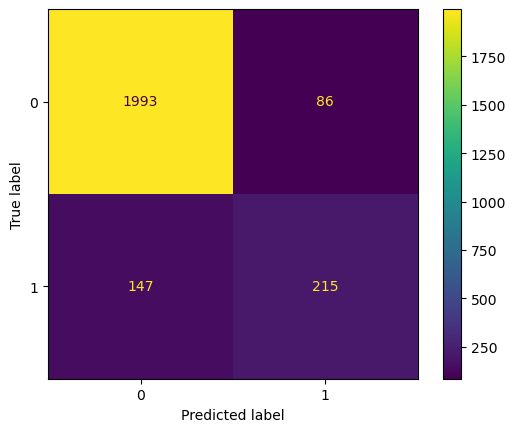

In [134]:
# Matriz de confusion
cm_XGB_intg_hpp_optimo = confusion_matrix(y1_test, XGB_intg_hpp_optimo.predict(X_test_XGB_intg))
# Visualización de la matriz de confusion
cm_XGB_intg_hpp_optimo_display = ConfusionMatrixDisplay(confusion_matrix = cm_XGB_intg_hpp_optimo)
cm_XGB_intg_hpp_optimo_display.plot()
plt.show()

#### Wrapper

In [135]:
# Modelo para tunning
XGB_warp_hpp = GradientBoostingClassifier(
    random_state= 123
)

grid_search_XGB_warp_hpp = GridSearchCV(XGB_warp_hpp, parameters, scoring = 'roc_auc', cv=5, n_jobs=-1)

# Iniciamos la busqueda
grid_result_XGB_warp_hpp = grid_search_XGB_warp_hpp.fit(X_train_XGB_wrap, y1_train)

print('Best Params: ', grid_result_XGB_warp_hpp.best_params_)
print('Best Score: ', grid_result_XGB_warp_hpp.best_score_)

Best Params:  {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 7, 'n_estimators': 300, 'subsample': 0.9}
Best Score:  0.9304324905202837


In [136]:
print('Características usadas en el entrenamiento: ', grid_result_XGB_warp_hpp.best_estimator_.feature_names_in_)
print('Importancia de las carcaterísticas: ', grid_result_XGB_warp_hpp.best_estimator_.feature_importances_)

Características usadas en el entrenamiento:  ['Reviews_Duration' 'Informational' 'Informational_Duration'
 'ProductRelated' 'ProductRelated_Duration' 'BounceRates' 'ExitRates'
 'PageValues' 'SpecialDay' 'Month_Aug' 'Month_Feb' 'Month_Jul' 'Month_Nov'
 'Month_Oct' 'Month_Sep' 'OperatingSystems_6' 'OperatingSystems_7'
 'Browser_12' 'Browser_13' 'Browser_3' 'Browser_6' 'TrafficType_11'
 'TrafficType_13' 'TrafficType_15' 'TrafficType_16' 'TrafficType_18'
 'TrafficType_3' 'TrafficType_5' 'TrafficType_8' 'VisitorType_Other']
Importancia de las carcaterísticas:  [4.75413017e-02 1.20952295e-02 2.28276980e-02 5.40309688e-02
 7.37312999e-02 5.26493158e-02 6.26133727e-02 6.02310077e-01
 3.43613163e-03 2.08380276e-03 3.02493705e-04 3.10790446e-03
 3.65045932e-02 2.77110524e-03 3.53338380e-03 4.42024409e-04
 6.72578584e-04 1.51099030e-03 6.64233831e-04 3.56773577e-04
 1.32349786e-03 9.35006070e-04 2.95925741e-03 3.08537304e-05
 9.38754527e-04 0.00000000e+00 3.42288168e-03 3.30996990e-03
 3.13799144

In [137]:
# Métricas de desempeño
# ==============================================================================
XGB_warp_hpp_optimo = grid_result_XGB_warp_hpp.best_estimator_

print ("Train - Accuracy :", metrics.accuracy_score(y1_train, XGB_warp_hpp_optimo.predict(X_train_XGB_wrap)))
print ("Train - classification report:\n", metrics.classification_report(y1_train, XGB_warp_hpp_optimo.predict(X_train_XGB_wrap), digits = 4))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, XGB_warp_hpp_optimo.predict(X_test_XGB_wrap)))
print ("Test - classification report\n:", metrics.classification_report(y1_test, XGB_warp_hpp_optimo.predict(X_test_XGB_wrap), digits = 4))

Train - Accuracy : 0.9402908643998361
Train - classification report:
               precision    recall  f1-score   support

           0     0.9485    0.9824    0.9652      8218
           1     0.8843    0.7167    0.7917      1546

    accuracy                         0.9403      9764
   macro avg     0.9164    0.8495    0.8784      9764
weighted avg     0.9384    0.9403    0.9377      9764

Test - Accuracy : 0.9029086439983613
Test - classification report
:               precision    recall  f1-score   support

           0     0.9244    0.9649    0.9442      2079
           1     0.7306    0.5470    0.6256       362

    accuracy                         0.9029      2441
   macro avg     0.8275    0.7559    0.7849      2441
weighted avg     0.8957    0.9029    0.8970      2441



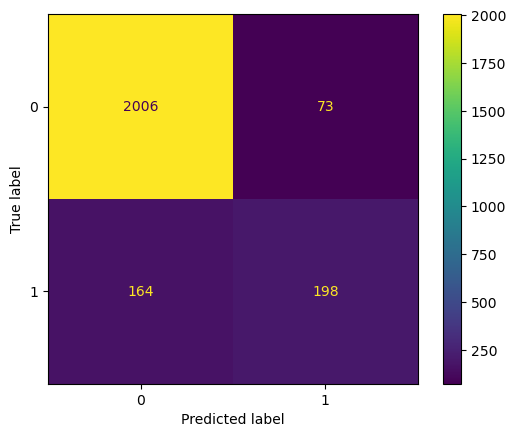

In [138]:
# Matriz de confusion
cm_XGB_warp_hpp_optimo = confusion_matrix(y1_test, XGB_warp_hpp_optimo.predict(X_test_XGB_wrap))
# Visualización de la matriz de confusion
cm_XGB_warp_hpp_optimo_display = ConfusionMatrixDisplay(confusion_matrix = cm_XGB_warp_hpp_optimo)
cm_XGB_warp_hpp_optimo_display.plot()
plt.show()